# Image Processing and Data Augmentation Methods

### 1. Image Preprocessing

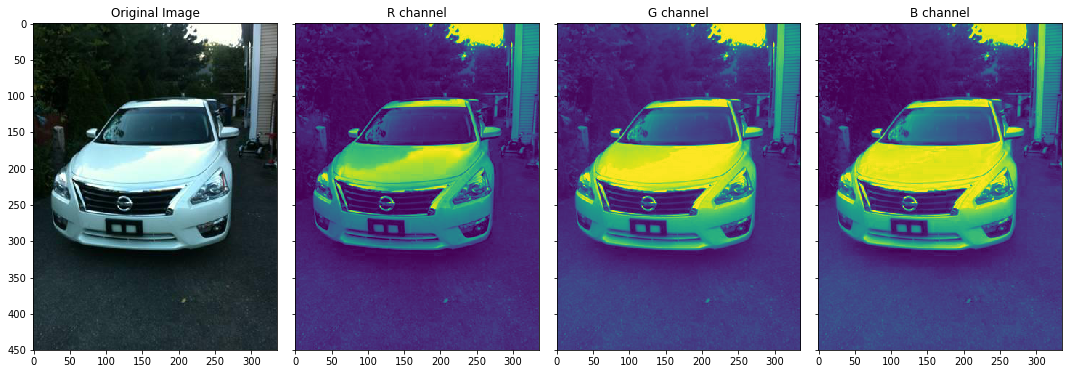

In [1]:
#Inspect R, G, B Channels indivudally
import glob, random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

file_list = glob.glob("../Dataset/SubsetVMMR/*/*")
img_path = random.choice(file_list)
image = mpimg.imread(img_path)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize = (15,15))

#Original Image
axes[0].set_title('Original Image')
axes[0].imshow(image)
# R channel
axes[1].set_title('R channel')
axes[1].imshow(image[:, :, 0])
# G channel.
axes[2].set_title('G channel')
axes[2].imshow(image[:, :, 1])
# B channel.
axes[3].set_title('B channel')
axes[3].imshow(image[:, :, 2])

plt.setp([axes[1].get_yticklabels()], visible=False)
plt.setp([axes[2].get_yticklabels()], visible=False)
plt.setp([axes[3].get_yticklabels()], visible=False)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

### 1.1. RGB-BGR Conversion

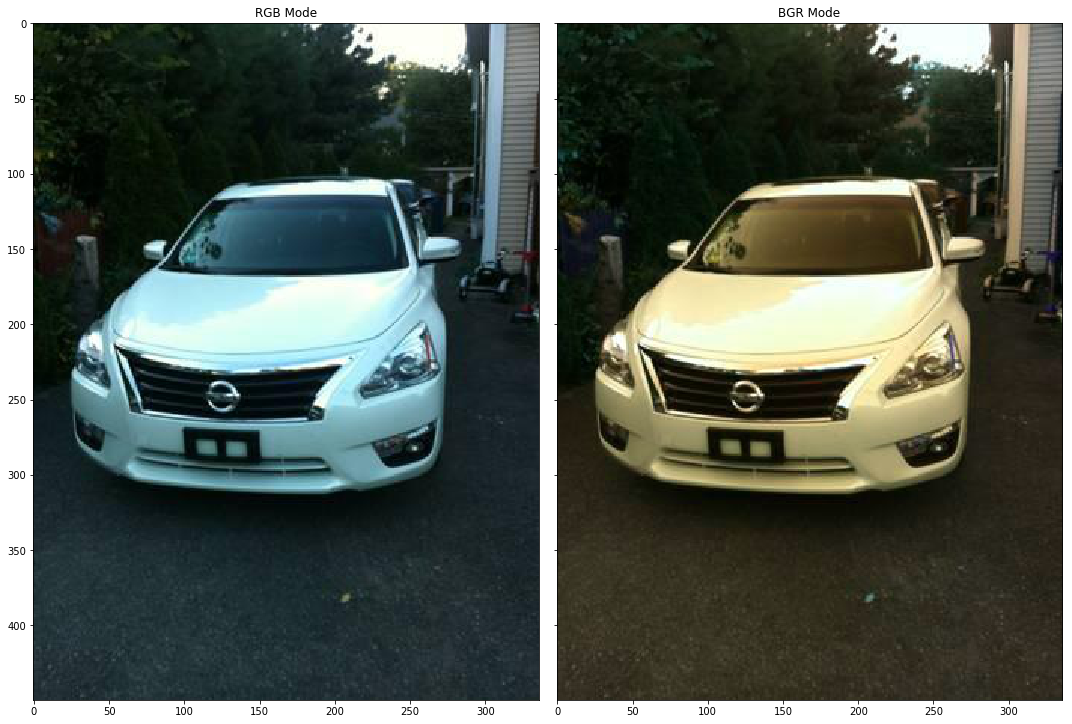

In [2]:
#Plot in RGB & BGR Mode
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,15))

#Image in RGB
axes[0].set_title('RGB Mode')
axes[0].imshow(image)
#Image in BGR
axes[1].set_title('BGR Mode')
axes[1].imshow(image[:, :, (2,1,0)])


plt.setp([axes[1].get_yticklabels()], visible=False)

fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

### 1.2. Rescaling

In [3]:
#Rescale Images
import os
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np 

img_height, img_width = 299, 299
train_path = "../Dataset/" + "SubsetVMMR/"
def compare_images(img1, img2, Title1="Original", Title2 ="Transformed", scale_option=False):
    if type(img1) == np.ndarray:
        img1 = array_to_img(img1, scale=scale_option)
    if type(img2) == np.ndarray:
        img2 = array_to_img(img2, scale=scale_option)
    plt.figure(figsize=(14, 6))
    plt.subplot(121)
    plt.imshow(img1)
    plt.axis("off")
    plt.title(Title1, fontsize=18)
    plt.subplot(122)
    plt.imshow(img2)
    plt.axis("off")
    plt.title(Title2, fontsize=18)
#Rescale colors
datagen_rescaled = ImageDataGenerator(rescale=1. / 255.)
datagen_default = ImageDataGenerator()

gen_default = datagen_default.flow_from_directory(train_path, 
                                                  target_size=(img_height, img_width), 
                                                  batch_size=1, 
                                                  shuffle=False, 
                                                  class_mode=None)
gen_rescaled = datagen_rescaled.flow_from_directory(train_path, 
                                                    target_size=(img_height, img_width), 
                                                    batch_size=1, 
                                                    shuffle=False, 
                                                    class_mode=None)

sample_default = next(gen_default)
sample_rescaled = next(gen_rescaled)

Using TensorFlow backend.


Found 5925 images belonging to 53 classes.
Found 5925 images belonging to 53 classes.


[array([[131., 158.],
        [139., 140.]], dtype=float32), array([[0.5137255 , 0.61960787],
        [0.54509807, 0.54901963]], dtype=float32)]

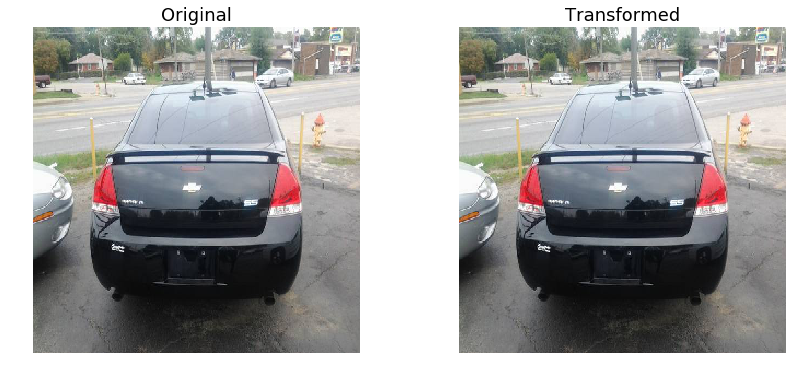

In [4]:
#Plot images to make comparison
compare_images(sample_default[0], sample_rescaled[0], scale_option = True)
#Check the Arrays to see the difference
[sample_default[0][:2, :2, 0], sample_rescaled[0][:2, :2, 0]]

### 1.3. Grayscaling

Found 5925 images belonging to 53 classes.


[array([[131., 158.],
        [139., 140.]], dtype=float32), array([[134., 161.],
        [142., 143.]], dtype=float32)]

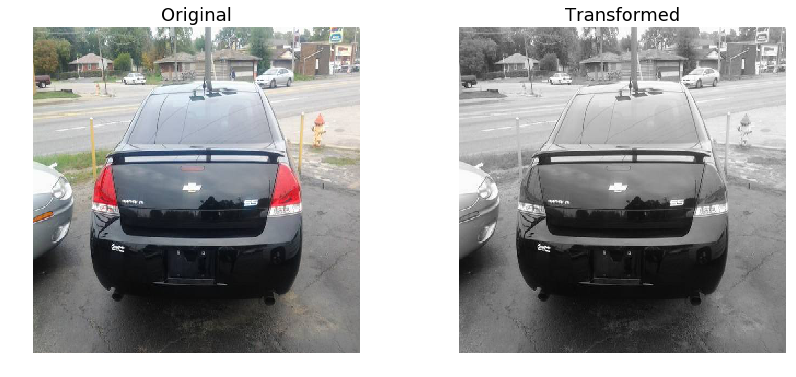

In [5]:
#Image Grayscaling
gen_grayscaled = datagen_default.flow_from_directory(train_path, 
                                                     target_size=(img_height, img_width), 
                                                     batch_size=1, 
                                                     shuffle=False, 
                                                     class_mode=None, 
                                                     color_mode="grayscale")
sample_grayscaled = next(gen_grayscaled)
compare_images(sample_default[0], sample_grayscaled[0])
#Check the Arrays to see the difference
[sample_default[0][:2, :2, 0], sample_grayscaled[0][:2, :2, 0]]

### 1.4. Samplewise centering

Found 5925 images belonging to 53 classes.


[array([[131., 158.],
        [139., 140.]], dtype=float32), array([[ 2.8775024, 29.877502 ],
        [10.877502 , 11.877502 ]], dtype=float32)]

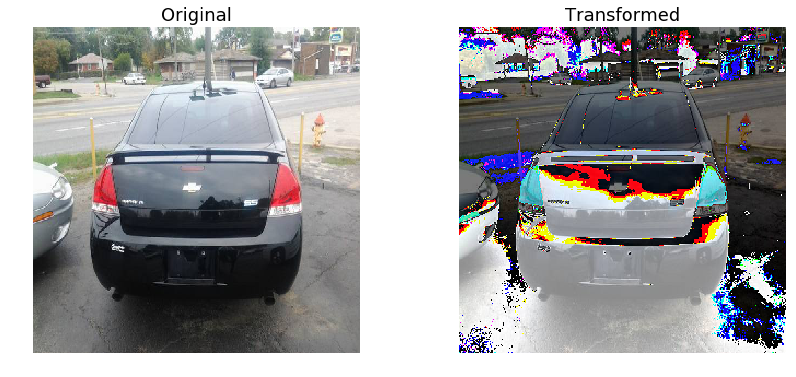

In [6]:
#Samplewise centering 
datagen_samplewise_mean = ImageDataGenerator(samplewise_center=True)
gen_samplewise_mean = datagen_samplewise_mean.flow_from_directory(train_path, 
                                                                  target_size=(img_height, img_width), 
                                                                  batch_size=1, 
                                                                  shuffle=False,  
                                                                  class_mode=None)
sample_samplewise_mean = next(gen_samplewise_mean)
compare_images(sample_default[0], sample_samplewise_mean[0])
#Check the Arrays to see the difference
[sample_default[0][:2, :2, 0], sample_samplewise_mean[0][:2, :2, 0]]

### 1.5. Samplewise std normalization

D:\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:353: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 5925 images belonging to 53 classes.


[array([[131., 158.],
        [139., 140.]], dtype=float32), array([[0.0421089 , 0.43722245],
        [0.15917958, 0.17381342]], dtype=float32)]

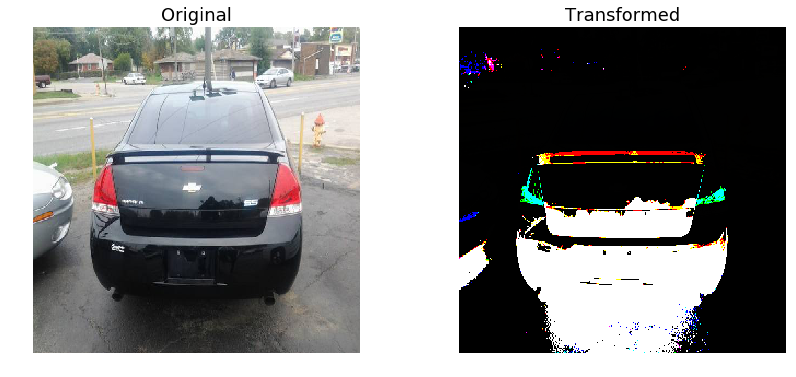

In [7]:
#Sampliwse std normalization
datagen_samplewise_std = ImageDataGenerator(samplewise_std_normalization=True)
gen_samplewise_std = datagen_samplewise_std.flow_from_directory(train_path, 
                                                                target_size=(img_height, img_width), 
                                                                batch_size=1, 
                                                                shuffle=False, 
                                                                class_mode=None)
sample_samplewise_std = next(gen_samplewise_std)
compare_images(sample_default[0], sample_samplewise_std[0])
#Check the Arrays to see the difference
[sample_default[0][:2, :2, 0], sample_samplewise_std[0][:2, :2, 0]]

## 2. Data Augmentation Techniques

### 2.1 Rotation

Found 5925 images belonging to 53 classes.


[array([[131., 158.],
        [139., 140.]], dtype=float32), array([[0., 0.],
        [0., 0.]], dtype=float32)]

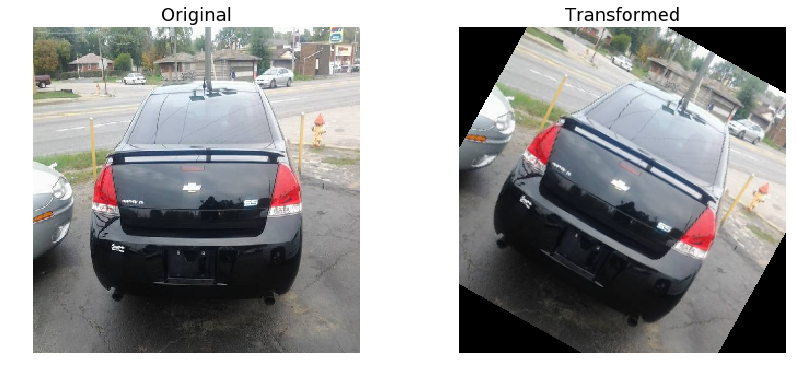

In [8]:
#Image Rotation
datagen_rotated = ImageDataGenerator(rotation_range=45, fill_mode="constant")
gen_rotated = datagen_rotated.flow_from_directory(train_path, 
                                                  target_size=(img_height, img_width), 
                                                  batch_size=1, 
                                                  shuffle=False, 
                                                  class_mode=None)
sample_rotated = next(gen_rotated)
compare_images(sample_default[0], sample_rotated[0])
#Check the Arrays to see the difference
[sample_default[0][:2, :2, 0], sample_rotated[0][:2, :2, 0]]

### 2.2 Horizontal & Vertical Shift

Found 5925 images belonging to 53 classes.
Found 5925 images belonging to 53 classes.


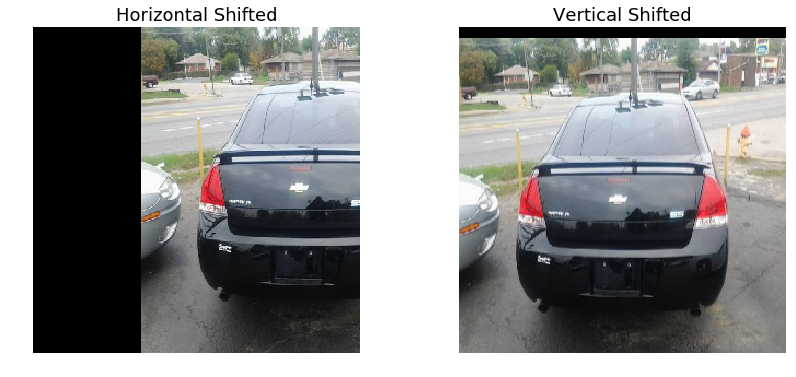

In [9]:
#Horizontal and Vertical Shift
datagen_hshifted = ImageDataGenerator(width_shift_range=0.4, fill_mode="constant")
datagen_vshifted = ImageDataGenerator(height_shift_range=0.4, fill_mode="constant")

gen_hshifted = datagen_hshifted.flow_from_directory(train_path, 
                                                    target_size=(img_height, img_width), 
                                                    batch_size=1, 
                                                    shuffle=False, 
                                                    class_mode=None)
gen_vshifted = datagen_vshifted.flow_from_directory(train_path, 
                                                    target_size=(img_height, img_width), 
                                                    batch_size=1, 
                                                    shuffle=False, 
                                                    class_mode=None)
sample_hshifted = next(gen_hshifted)
sample_vshifted = next(gen_vshifted)
compare_images(sample_hshifted[0], sample_vshifted[0], Title1="Horizontal Shifted", Title2="Vertical Shifted")

### 2.3 Horizontal & Vertical Flip

Found 5925 images belonging to 53 classes.
Found 5925 images belonging to 53 classes.


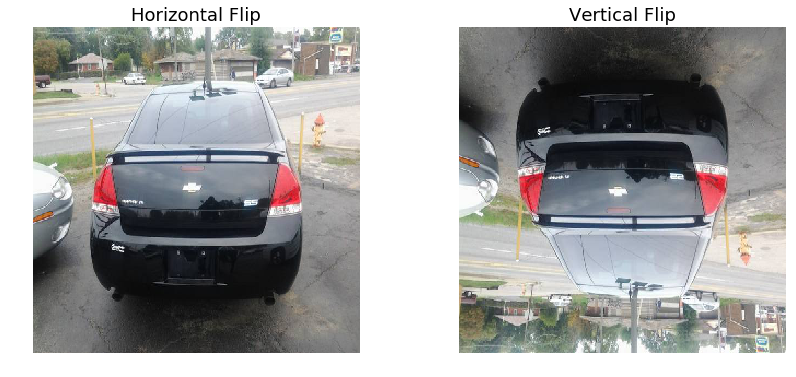

In [10]:
#Horizontal and Vertical Flip
datagen_hflipped = ImageDataGenerator(horizontal_flip=True)
datagen_vflipped = ImageDataGenerator(vertical_flip=True)

gen_hflipped = datagen_hflipped.flow_from_directory(train_path, 
                                                    target_size=(img_height, img_width), 
                                                    batch_size=1, 
                                                    shuffle=False, 
                                                    class_mode=None)
gen_vflipped = datagen_vflipped.flow_from_directory(train_path, 
                                                    target_size=(img_height, img_width), 
                                                    batch_size=1, 
                                                    shuffle=False, 
                                                    class_mode=None)
sample_hflipped = next(gen_hflipped)
sample_vflipped = next(gen_vflipped)
compare_images(sample_hflipped[0], sample_vflipped[0], Title1="Horizontal Flip", Title2="Vertical Flip")

### 2.4 Zoom & Shearing

Found 5925 images belonging to 53 classes.
Found 5925 images belonging to 53 classes.


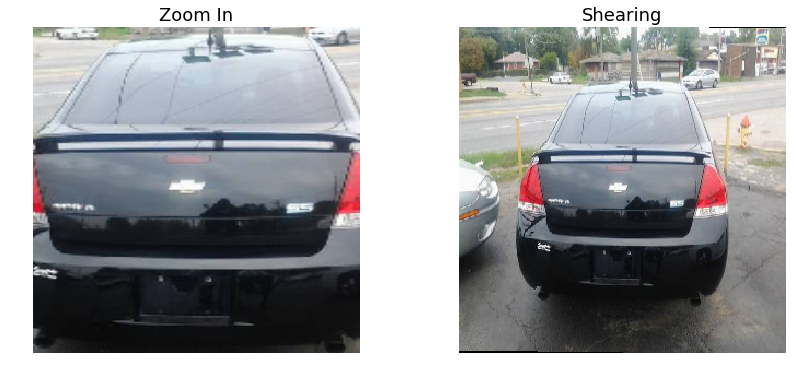

In [11]:
#Zoom in and Shearing 
datagen_sheared = ImageDataGenerator(shear_range=0.75, fill_mode="constant")
datagen_zoomed = ImageDataGenerator(zoom_range=0.5, fill_mode="constant")

gen_sheared = datagen_sheared.flow_from_directory(train_path, 
                                                  target_size=(img_height, img_width), 
                                                  batch_size=1, 
                                                  shuffle=False, 
                                                  class_mode=None)
gen_zoomed = datagen_zoomed.flow_from_directory(train_path, 
                                                target_size=(img_height, img_width), 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode=None)
sample_sheared = next(gen_sheared)
sample_zoomed = next(gen_zoomed)
compare_images(sample_zoomed[0], sample_sheared[0], Title1="Zoom In", Title2="Shearing")

### 2.5 Combination

Dataset


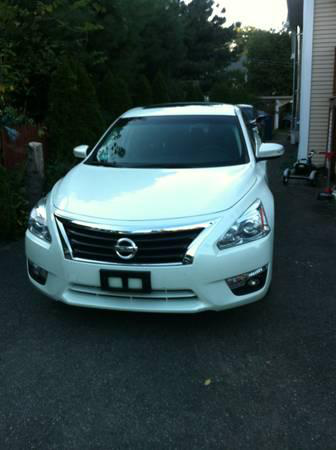

In [12]:
#Select a random image and follow the next step
datagen = ImageDataGenerator(rotation_range=45, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             shear_range=0.2, 
                             zoom_range=0.3, 
                             horizontal_flip=True, 
                             vertical_flip=True, 
                             fill_mode="nearest")
#Load example image
img = load_img(img_path)
print(img_path.split("/")[1])
img

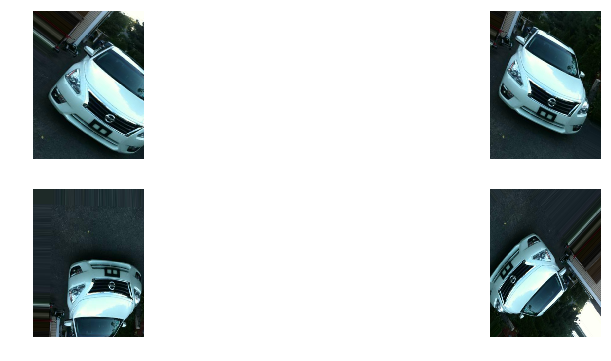

In [13]:
#Apply different augmentation techniques
img = img_to_array(img)
img = img.reshape((1,) + img.shape)
n_augmentations = 4
plt.figure(figsize=(15, 6))    
i = 0

for batch in datagen.flow(img, 
                          batch_size=1, 
                          seed=21):
    
    plt.subplot(2, int(np.ceil(n_augmentations * 1. / 2)), i + 1)
    plt.imshow(array_to_img(batch[0]))
    plt.axis("off")
    
    i += 1
    if i >= n_augmentations:
        break